In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Plib imports
import Plib.Utils.Tools as t
import Plib.Futures.TradersCommitment as f

%matplotlib inline

In [2]:
url1='https://www.nass.usda.gov/Publications/National_Crop_Progress/'
url1a='https://www.nass.usda.gov/Charts_and_Maps/Crop_Progress_&_Condition/2022/US_2022.pdf'
url1b='https://usda.library.cornell.edu/concern/publications/8336h188j'
url1c='https://usda.library.cornell.edu/concern/publications/tm70mv177?locale=en'

url2='https://www.usda.gov/oce/weather-drought-monitor'
url2a='https://www.usda.gov/tmp/wwcb.pdf'
url2b='https://www.usda.gov/sites/default/files/documents/TODAYSWX.pdf'

url3=' https://usda.library.cornell.edu/concern/publications/3t945q76s?release_start_date=1995-01-31&release_end_date=1995-01-31&locale=en'

url4='https://www.usda.gov/sites/default/files/documents/oce-wasde-report-data-2022-08.csv'

url5='https://www.drought.gov/historical-information?dataset=0&selectedDateUSDM=20121218#'

#t.openWebPage(url5)


### Create Data from historical archives

In [4]:
hdfname='TradersCommitment2.hdf'  #for local test only
##f.removeKey(table='Wasde',myfile=hdfname)
f.createWasde(myfile=hdfname)

Added  697285  records


### Update from web

In [5]:
df=f.downloadWasde(year='2022',month='09',myfile=hdfname,update=True)

[=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Read data

In [6]:
f.getWasdeCommList(myfile=hdfname)

['Coarse Grain',
 'Cotton',
 'Oilseed, Soybean',
 'RICE, milled',
 'Wheat',
 'Barley',
 'Corn',
 'Meal, Soybean',
 'Oats',
 'Oil, Soybean',
 'Sorghum']

In [7]:
f.getWasdeSeries(comm='Wheat',myfile=hdfname)

['Domestic Use',
 'Ending Stocks',
 'Exports',
 'Production',
 'Area Harvested',
 'Area Planted',
 'Avg. farm price',
 'Beginning stocks',
 'CCC inventory',
 'Domestic, total',
 'Ending stocks',
 'Feed and residual',
 'Food',
 'Free stocks',
 'Imports',
 'Outstanding loans',
 'Seed',
 'Supply, total',
 'Use, total',
 'Yield per harvested acre',
 'Avg. farm price - High',
 'Avg. farm price - Low',
 'Output',
 'Total Supply',
 'Total Use',
 'Trade',
 'Beginning Stocks',
 'Domestic Feed',
 'Domestic Total',
 'Avg. Farm Price',
 'CCC Inventory',
 'Domestic, Total',
 'Feed and Residual',
 'Free Stocks',
 'Outstanding Loans',
 'Supply, Total',
 'Use, Total',
 'Yield per Harvested Acre',
 'Avg. Farm Price - High',
 'Avg. Farm Price - Low']

In [3]:
df,unit=f.getWasde(comm='Wheat', attr='Domestic Use', proj='average',country='United States', myfile=hdfname)
df.head(2)

DomesticUse
ReleaseDate            
2011-05-11          1.9
2011-06-09          1.9

In [3]:
df,unit=f.getWasde(comm='Wheat', attr='Production', proj='average',country='United States', myfile=hdfname)
df.head(2)

Production
ReleaseDate           
2011-05-11         3.2
2011-06-09         2.8

Available records:  ['Swap Dealers' 'Producers Merchants' 'Managed Money' 'Other Reportables'
 'Non-Reportables']
Matched contract: 067651 Crude Oil Producers Merchants


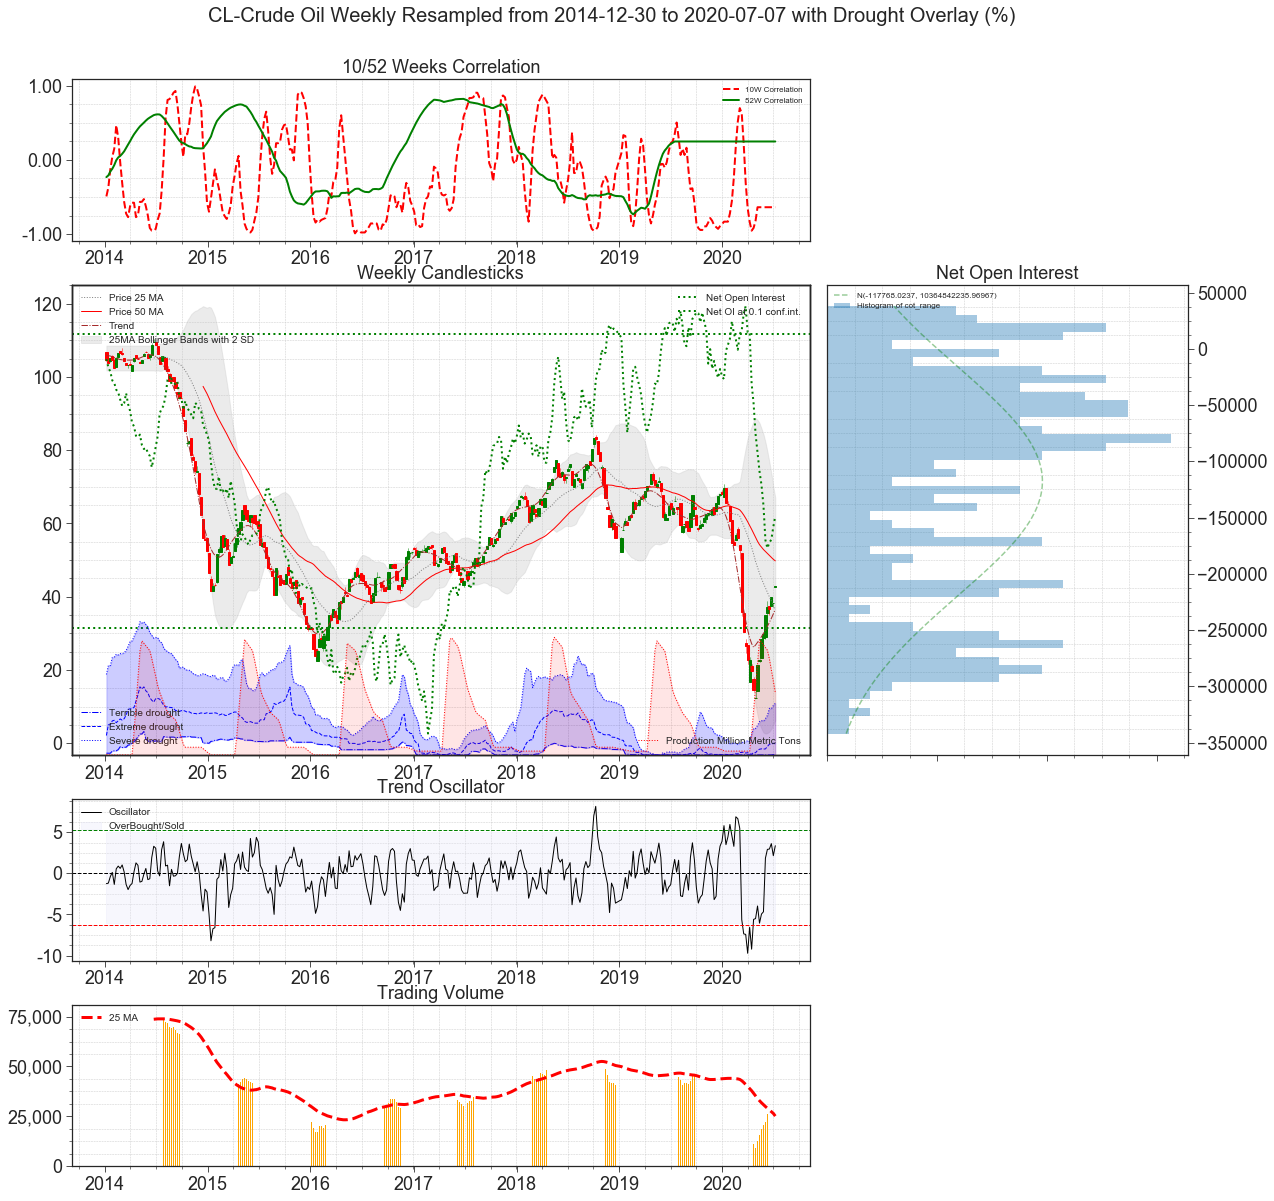

Jarque-Bera statistic: 25.59 with p-value: 0.00
Cot net OI likely not normally distributed.


UP%5Y  AVG$$  AVGProf%  AVGLoss%  Trend30D  MA18D  VOL30D%
Monday      50.0  -0.45      4.11     -6.93     -0.14  44.22    87.48
Tuesday     46.0  -0.44      3.25     -2.34     -0.14  44.09    87.42
Wednesday   51.0  -0.42      3.13     -5.63     -0.14  43.99    87.77
Thursday    54.0  -0.39      5.11     -2.86     -0.14  43.90    87.35
Friday      51.0  -0.37      3.70     -3.61     -0.14  43.81    87.65

Statistics computer over last 30 weeks.


In [6]:
# Obtain daily data and resample to weekly, ending in tuesday
data = pd.read_csv("./data/"+"crude_oil_prices.csv", index_col=0, parse_dates=True)
data.columns=['Open']
data.index = pd.to_datetime(data.index, errors='coerce')
data = data.asfreq(freq='d', method='bfill')
data=data.sort_index()
data['High']=data['Open']
data['Low']=data['Open']
data['Close']=data['Open']
data['Volume']=data['Open']*100

hdfname='./data/TradersCommitment2.hdf'

#drought=['conus'], wasdep=['Wheat','Production','average','United States']
data = f.plotFutureContract(symbol='CL', data=data, lbl='Close', provider='kibot', dstart = '2014-12-30', dend = '2020-07-07', 
                        stats=True, statsp=('Open', 18, 30, 30),
                        drought=[], wasdep=[], hdfname=hdfname)


In [7]:
data.tail(30)

Open   High    Low  Close  Volume     OI_Net  Delta$$  MA18D  \
Date                                                                        
2020-05-25  29.75  29.75  29.75  29.75  2975.0 -136543.86    -4.72  26.48   
2020-05-26  29.75  29.75  29.75  29.75  2975.0 -139132.00    -4.68  26.90   
2020-05-27  29.03  29.03  29.03  29.03  2903.0 -143554.71    -3.75  27.25   
2020-05-28  28.45  28.45  28.45  28.45  2845.0 -147977.43    -2.81  27.57   
2020-05-29  29.01  29.01  29.01  29.01  2901.0 -152400.14    -1.88  27.92   
2020-06-01  33.69  33.69  33.69  33.69  3369.0 -165668.29     0.91  29.59   
2020-06-02  34.96  34.96  34.96  34.96  3496.0 -170091.00     1.85  30.06   
2020-06-03  35.47  35.47  35.47  35.47  3547.0 -171091.00     2.00  30.46   
2020-06-04  34.85  34.85  34.85  34.85  3485.0 -172091.00     2.15  30.83   
2020-06-05  36.84  36.84  36.84  36.84  3684.0 -173091.00     2.30  31.31   
2020-06-08  38.89  38.89  38.89  38.89  3889.0 -176091.00     2.76  32.97   
2020-06-09  37.10  37.10  37.10  37.10  3710.0 -177091.00     2.92  33.47   
2020-06-10  37.46  37.46  37.46  37.46  3746.0 -176407.86     2.92  33.90   
2020-06-11  36.56  36.56  36.56  36.56  3656.0 -175724.71     2.93  34.28   
2020-06-12  35.06  35.06  35.06  35.06  3506.0 -175041.57     2.93  34.57   
2020-06-15  35.09  35.09  35.09  35.09  3509.0 -172992.14     2.95  35.57   
2020-06-16  36.75  36.75  36.75  36.75  3675.0 -172309.00     2.95  36.00   
2020-06-17  37.59  37.59  37.59  37.59  3759.0 -171908.71     3.05  36.22   
2020-06-18  37.70  37.70  37.70  37.70  3770.0 -171508.43     3.14  36.44   
2020-06-19  39.45  39.45  39.45  39.45  3945.0 -171108.14     3.24  36.76   
2020-06-22  38.96  38.96  38.96  38.96  3896.0 -169907.29     3.52  37.41   
2020-06-23  39.85  39.85  39.85  39.85  3985.0 -169507.00     3.61  37.57   
2020-06-24  38.17  38.17  38.17  38.17  3817.0 -167892.57     3.40  37.53   
2020-06-25  37.18  37.18  37.18  37.18  3718.0 -166278.14     3.20  37.44   
2020-06-26  37.99  37.99  37.99  37.99  3799.0 -164663.71     2.99  37.39   
2020-06-29  37.34  37.34  37.34  37.34  3734.0 -159820.43     2.36  37.44   
2020-06-30  38.22  38.22  38.22  38.22  3822.0 -158206.00     2.15  37.62   
2020-07-01  42.66  42.66  42.66  42.66  4266.0 -158206.00     2.15  38.04   
2020-07-02  42.89  42.89  42.89  42.89  4289.0 -158206.00     2.15  38.47   
2020-07-03  42.93  42.93  42.93  42.93  4293.0 -158206.00     2.15  38.90   

            Vol30D%  Rets%  Trend  
Date                               
2020-05-25    166.0   6.02   0.11  
2020-05-26    165.0   0.00   0.11  
2020-05-27    161.0  -2.42   0.11  
2020-05-28    161.0  -2.00   0.11  
2020-05-29    161.0   1.97   0.12  
2020-06-01    151.0  16.13   0.12  
2020-06-02    151.0   3.77   0.12  
2020-06-03    141.0   1.46   0.12  
2020-06-04    125.0  -1.75   0.12  
2020-06-05    125.0   5.71   0.12  
2020-06-08    124.0   5.56   0.13  
2020-06-09    123.0  -4.60   0.13  
2020-06-10    116.0   0.97   0.13  
2020-06-11     94.0  -2.40   0.13  
2020-06-12     91.0  -4.10   0.13  
2020-06-15     86.0   0.09   0.14  
2020-06-16     74.0   4.73   0.14  
2020-06-17     73.0   2.29   0.14  
2020-06-18     73.0   0.29   0.14  
2020-06-19     74.0   4.64   0.14  
2020-06-22     73.0  -1.24   0.15  
2020-06-23     74.0   2.28   0.15  
2020-06-24     75.0  -4.22   0.15  
2020-06-25     72.0  -2.59   0.15  
2020-06-26     70.0   2.18   0.15  
2020-06-29     68.0  -1.71   0.15  
2020-06-30     68.0   2.36   0.15  
2020-07-01     75.0  11.62   0.15  
2020-07-02     75.0   0.54   0.15  
2020-07-03     73.0   0.09   0.14